#Randomized Algorithms

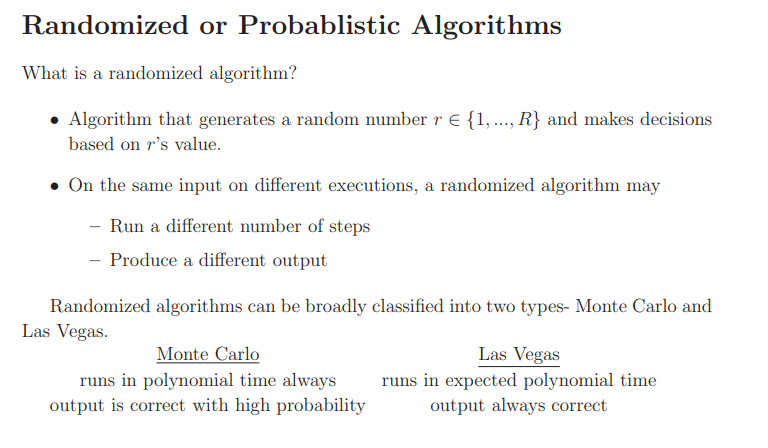

#Monte Carlo Algorithm for Pi

In [1]:
import random

def monte_carlo_pi(num_samples):
    inside_circle = 0
    total_samples = num_samples

    for _ in range(num_samples):
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)
        distance = x**2 + y**2
        if distance <= 1:
            inside_circle += 1

    pi_estimate = 4 * inside_circle / total_samples
    return pi_estimate

# Example usage:
num_samples = 1000000
estimated_pi = monte_carlo_pi(num_samples)
print("Estimated value of π using Monte Carlo method with", num_samples, "samples:", estimated_pi)


Estimated value of π using Monte Carlo method with 1000000 samples: 3.137988


#Las Vegas Algorithm for Sqrt Root

In [2]:
def las_vegas_sqrt(n, epsilon=1e-10):
    """
    Find the square root of a number 'n' using Newton's method.
    Las Vegas algorithm: always returns the correct result, but the runtime may vary.
    """
    if n < 0:
        raise ValueError("Cannot compute square root of a negative number")

    guess = n / 2  # Initial guess
    while abs(guess * guess - n) > epsilon:
        guess = (guess + n / guess) / 2

    return guess

# Example usage:
number = 25
sqrt_result = las_vegas_sqrt(number)
print("Square root of", number, "is approximately:", sqrt_result)


Square root of 25 is approximately: 5.0


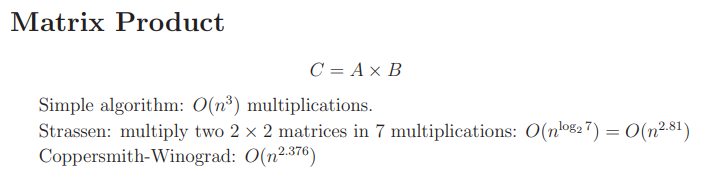

In [3]:
import random

def monte_carlo_matrix_product(A, B, num_samples):
    """
    Monte Carlo approach to compute the product of two matrices.
    """
    if len(A[0]) != len(B):
        raise ValueError("Number of columns in A must equal number of rows in B")

    rows_A = len(A)
    cols_B = len(B[0])
    product = [[0 for _ in range(cols_B)] for _ in range(rows_A)]

    for _ in range(num_samples):
        i = random.randint(0, rows_A - 1)
        j = random.randint(0, cols_B - 1)
        for k in range(len(B)):
            product[i][j] += A[i][k] * B[k][j]

    return product

# Example usage:
A = [[1, 2, 3], [4, 5, 6]]
B = [[7, 8], [9, 10], [11, 12]]
num_samples = 1000
result = monte_carlo_matrix_product(A, B, num_samples)
print("Monte Carlo Matrix Product:")
for row in result:
    print(row)

def las_vegas_matrix_product(A, B):
    """
    Las Vegas approach to compute the product of two matrices.
    """
    if len(A[0]) != len(B):
        raise ValueError("Number of columns in A must equal number of rows in B")

    rows_A = len(A)
    cols_B = len(B[0])
    product = [[0 for _ in range(cols_B)] for _ in range(rows_A)]

    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(len(B)):
                product[i][j] += A[i][k] * B[k][j]

    return product

# Example usage:
A = [[1, 2, 3], [4, 5, 6]]
B = [[7, 8], [9, 10], [11, 12]]
result = las_vegas_matrix_product(A, B)
print("Las Vegas Matrix Product:")
for row in result:
    print(row)


Monte Carlo Matrix Product:
[14152, 16064]
[33221, 40964]
Las Vegas Matrix Product:
[58, 64]
[139, 154]


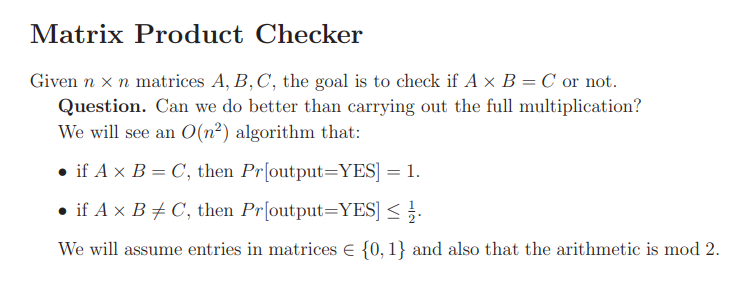

In [4]:
def matrix_product_checker(A, B, C):
    """
    Check if the product of matrices A and B matches matrix C.
    """
    rows_A = len(A)
    cols_B = len(B[0])
    if len(A[0]) != len(B):
        raise ValueError("Number of columns in A must equal number of rows in B")

    for i in range(rows_A):
        for j in range(cols_B):
            expected_value = 0
            for k in range(len(B)):
                expected_value += A[i][k] * B[k][j]
            if abs(expected_value - C[i][j]) > 1e-6:  # Tolerance for floating-point comparison
                return False
    return True

# Example usage:
A = [[1, 2, 3], [4, 5, 6]]
B = [[7, 8], [9, 10], [11, 12]]

# Using Las Vegas algorithm
result_las_vegas = las_vegas_matrix_product(A, B)

# Using Monte Carlo algorithm
num_samples = 1000
result_monte_carlo = monte_carlo_matrix_product(A, B, num_samples)

# Using straightforward matrix multiplication as reference
import numpy as np
reference_result = np.matmul(A, B)

# Checking results
if matrix_product_checker(A, B, result_las_vegas):
    print("Las Vegas Matrix Product is correct.")
else:
    print("Las Vegas Matrix Product is incorrect.")

if matrix_product_checker(A, B, result_monte_carlo):
    print("Monte Carlo Matrix Product is correct.")
else:
    print("Monte Carlo Matrix Product is incorrect.")

if np.allclose(result_las_vegas, reference_result) and np.allclose(result_monte_carlo, reference_result):
    print("All results match with the reference.")
else:
    print("Results do not match with the reference.")


Las Vegas Matrix Product is correct.
Monte Carlo Matrix Product is incorrect.
Results do not match with the reference.


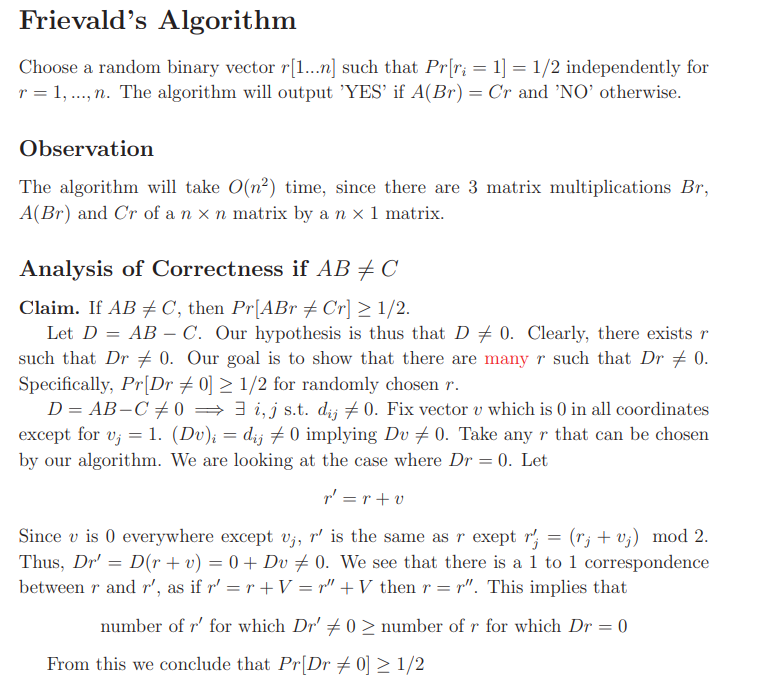

In [13]:
import random

def generate_random_vector(n):
    return [random.choice([0, 1]) for _ in range(n)]

def matrix_vector_product(matrix, vector):
    n = len(vector)
    result = [0] * n
    for i in range(n):
        for j in range(n):
            result[i] ^= matrix[i][j] & vector[j]  # Bitwise XOR operation
    return result

def frievalds_algorithm(A, B, C):
    n = len(A)
    r = generate_random_vector(n)
    Ar = matrix_vector_product(A, r)
    Cr = matrix_vector_product(C, r)
    BCr = matrix_vector_product(B, Cr)

    if Ar == BCr:
        return "Yes"
    else:
        return "No"

# Example usage:
# Define the Boolean matrices A, B, and C
A = [[1, 0, 1],
     [0, 1, 0],
     [1, 0, 1]]

B = [[1, 0, 1],
     [0, 1, 0],
     [1, 0, 1]]

C = [[1, 0, 1],
     [0, 1, 0],
     [1, 0, 1]]

result = frievalds_algorithm(A, B, C)
print("Are A and B equal according to Frievalds' algorithm?", result)


Are A and B equal according to Frievalds' algorithm? No


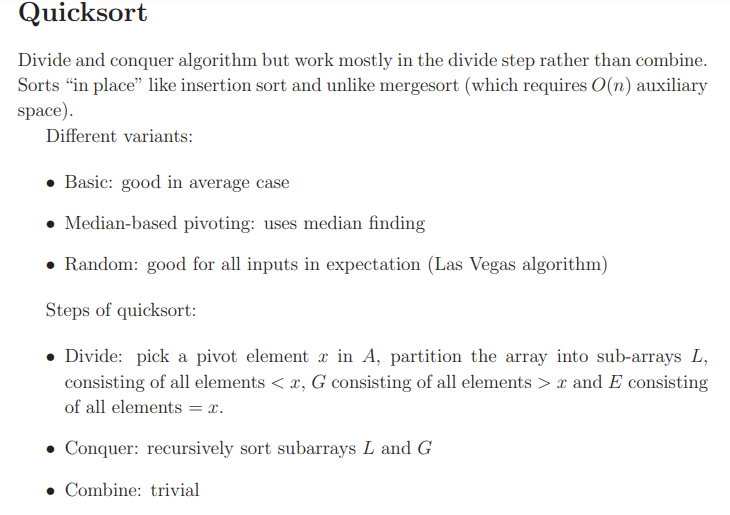

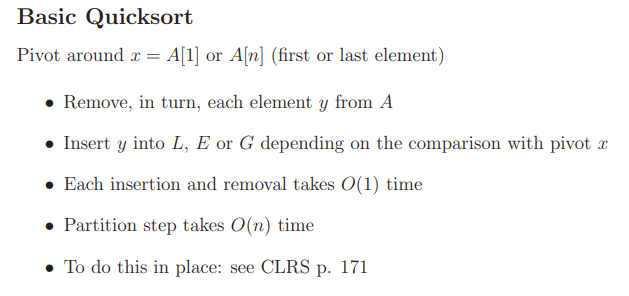

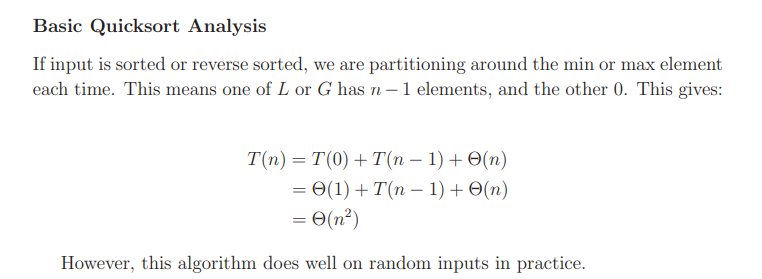

With Hoare partition scheme

In [14]:
def quicksort(arr):
    def partition(arr, low, high):
        pivot = arr[(low + high) // 2]
        i = low - 1
        j = high + 1
        while True:
            i += 1
            while arr[i] < pivot:
                i += 1
            j -= 1
            while arr[j] > pivot:
                j -= 1
            if i >= j:
                return j
            arr[i], arr[j] = arr[j], arr[i]

    def _quicksort(arr, low, high):
        if low < high:
            pi = partition(arr, low, high)
            _quicksort(arr, low, pi)
            _quicksort(arr, pi + 1, high)

    _quicksort(arr, 0, len(arr) - 1)

# Example usage:
arr = [3, 6, 8, 10, 1, 2, 1]
quicksort(arr)
print("Sorted array:", arr)


Sorted array: [1, 1, 2, 3, 6, 8, 10]


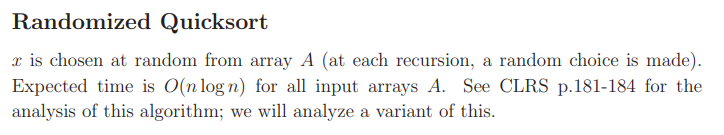

In [15]:
import random

def randomized_quicksort(arr):
    def partition(arr, low, high):
        pivot_index = random.randint(low, high)
        pivot = arr[pivot_index]
        i = low - 1
        j = high + 1
        while True:
            i += 1
            while arr[i] < pivot:
                i += 1
            j -= 1
            while arr[j] > pivot:
                j -= 1
            if i >= j:
                return j
            arr[i], arr[j] = arr[j], arr[i]

    def _randomized_quicksort(arr, low, high):
        if low < high:
            pi = partition(arr, low, high)
            _randomized_quicksort(arr, low, pi)
            _randomized_quicksort(arr, pi + 1, high)

    _randomized_quicksort(arr, 0, len(arr) - 1)

# Example usage:
arr = [3, 6, 8, 10, 1, 2, 1]
randomized_quicksort(arr)
print("Sorted array:", arr)


Sorted array: [1, 1, 2, 3, 6, 8, 10]


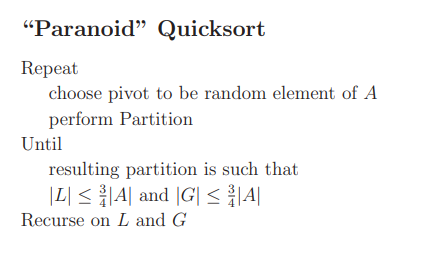

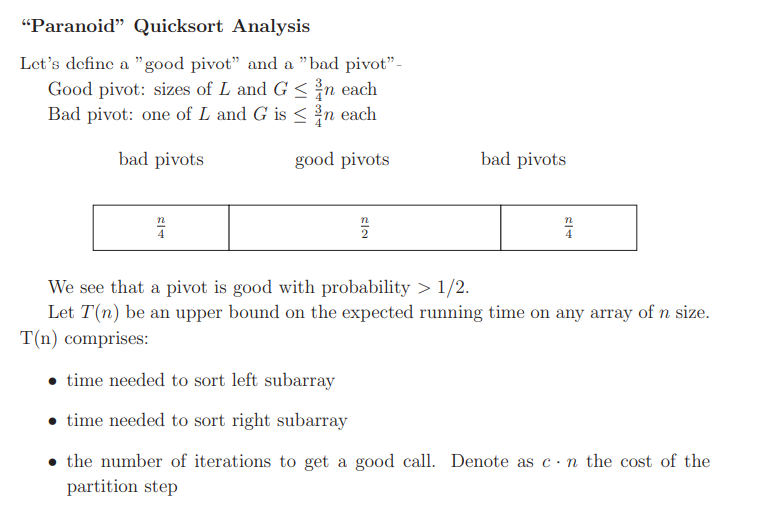

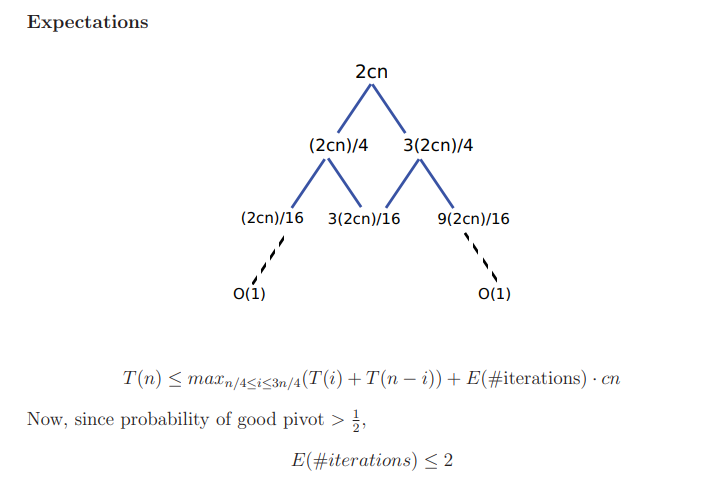

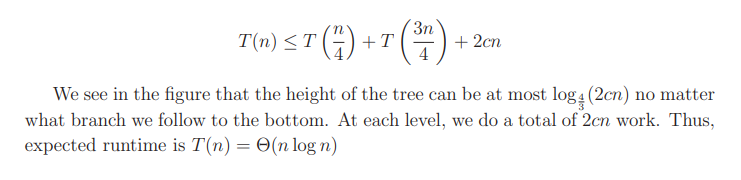

In [17]:
import random

def paranoid_quicksort(arr):
    if len(arr) <= 1:
        return arr

    pivot = random.choice(arr)
    L = []
    E = []
    G = []

    for element in arr:
        if element < pivot:
            L.append(element)
        elif element == pivot:
            E.append(element)
        else:
            G.append(element)

    if len(L) <= 3 * len(arr) // 4 and len(G) <= 3 * len(arr) // 4:
        return paranoid_quicksort(L) + E + paranoid_quicksort(G)
    else:
        return arr

# Example usage:
arr = [3, 6, 8, 10, 1, 2, 1, 5, 9, 4]
sorted_arr = paranoid_quicksort(arr)
print(sorted_arr)


[1, 1, 2, 3, 4, 5, 6, 8, 9, 10]


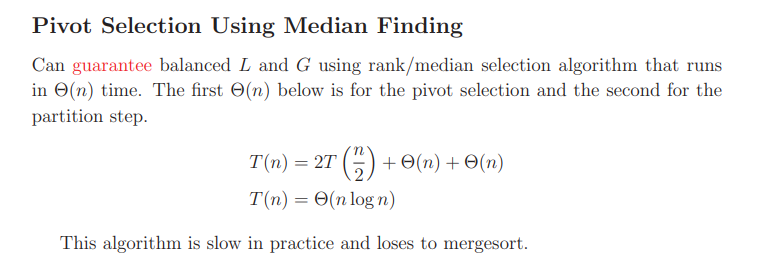

In [19]:
import random

def quicksort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = median_of_medians(arr)
        less = [x for x in arr if x < pivot]
        equal = [x for x in arr if x == pivot]
        greater = [x for x in arr if x > pivot]
        return quicksort(less) + equal + quicksort(greater)

def median_of_medians(arr):
    if len(arr) <= 5:
        return sorted(arr)[len(arr)//2]
    chunks = [arr[i:i+5] for i in range(0, len(arr), 5)]
    medians = [sorted(chunk)[len(chunk)//2] for chunk in chunks]
    pivot = median_of_medians(medians)
    return pivot

# Example usage:
arr = [random.randint(1, 100) for _ in range(20)]
print("Original array:", arr)
sorted_arr = quicksort(arr)
print("Sorted array:", sorted_arr)


Original array: [81, 75, 21, 6, 11, 29, 67, 93, 98, 82, 77, 6, 30, 61, 28, 29, 17, 98, 91, 41]
Sorted array: [6, 6, 11, 17, 21, 28, 29, 29, 30, 41, 61, 67, 75, 77, 81, 82, 91, 93, 98, 98]
